## Grover's Algorithm

In [89]:
# Useful additional packages
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from math import pi

In [90]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit import Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.visualization import *
from qiskit.providers.aer import UnitarySimulator
from qiskit.tools.visualization import circuit_drawer
from qiskit.quantum_info import state_fidelity
from qiskit import BasicAer


backend = BasicAer.get_backend('unitary_simulator')

---------

![img](img/ga.gif)

### Fundamental Gates used in Grover's Algorithm

#### H - Hadamard gate

$$
H = 
\frac{1}{\sqrt{2}}
\begin{pmatrix}
1 & 1\\
1 & -1
\end{pmatrix}
$$

#### $X$ -  Bit-flip gate

$$
X   =  
\begin{pmatrix}
0 & 1\\
1 & 0
\end{pmatrix}= u3(\pi,0,\pi)
$$

####  $C_z$ - Controlled Phase gate

$$
C_Z = 
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 0 & 0 & -1
\end{pmatrix}
$$


#### $Z$: Phase-flip gate

$$
Z = 
\begin{pmatrix}
1 & 0\\
0 & -1
\end{pmatrix}=u1(\pi)
$$

###  1. Implementing Grover's Algorithm in two qubits database

In [91]:
qr = QuantumRegister(2)
cr = ClassicalRegister(2)
groverCircuit = QuantumCircuit(qr,cr)

#### 1.1 Apply Hadamard gate to both qubit

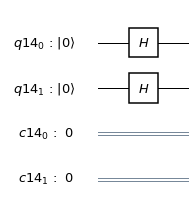

In [92]:
groverCircuit.h(qr)
groverCircuit.draw(output="mpl")

#### 1.1.1. Matrix element 

- H operator in product space, $H_2 = H_1 \otimes H_1$ :

$\frac{1}{\sqrt{2}}\begin{bmatrix}
    1  &  1 \\
    1  & -1
\end{bmatrix} \otimes \frac{1}{\sqrt{2}}\begin{bmatrix}
    1  &  1 \\
    1  & -1
\end{bmatrix} = \frac{1}{2} \begin{bmatrix}
    1  &  1  &  1  &  1 \\
    1  &  -1  &  1  &  -1 \\
    1  &  1  &  -1  &  -1 \\
    1  &  -1  &  -1  &  1 \\
\end{bmatrix}$

- Basis States in product space, $|q_1q_2> = q_1 \otimes q_2$ : 

|00> = $\begin{bmatrix}
    1  \\
    0 \\
    0\\
    0
\end{bmatrix}$ ; |01> = $\begin{bmatrix}
    0\\
    1\\
    0\\
    0
\end{bmatrix}$ ; |10> = $\begin{bmatrix}
    0  \\
    0 \\
    1\\
    0
\end{bmatrix}$ ; |11> = $\begin{bmatrix}
    0\\
    0\\
    0\\
    1
\end{bmatrix}$

In [93]:
job = execute(groverCircuit, backend)
job.result().get_unitary(groverCircuit, decimals=3)

array([[ 0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j],
       [ 0.5+0.j, -0.5+0.j,  0.5+0.j, -0.5+0.j],
       [ 0.5+0.j,  0.5+0.j, -0.5+0.j, -0.5+0.j],
       [ 0.5+0.j, -0.5+0.j, -0.5+0.j,  0.5+0.j]])

#### 1.1.2. Manual approach

---------
- Initial state: |00>
- After Hadamard Gate on first qubit: $\frac{1}{\sqrt{2}}|00> + \frac{1}{\sqrt{2}}|10>$
- After Hadamard Gate on second qubit: $\frac{1}{{2}}|00> + \frac{1}{{2}}|01>  +  \frac{1}{{2}}|10> + \frac{1}{{2}}|11>$

---------
- This is tensor product of two Hedamard transform:
$H|0>_A \otimes H|0>_B$
- i.e., $(\frac{1}{\sqrt{2}}|0> + \frac{1}{\sqrt{2}}|1>) \otimes (\frac{1}{\sqrt{2}}|0> + \frac{1}{\sqrt{2}}|1>) = \frac{1}{{2}}|00> + \frac{1}{{2}}|01>  +  \frac{1}{{2}}|10> + \frac{1}{{2}}|11>$




#### 1.1.3 Measurement

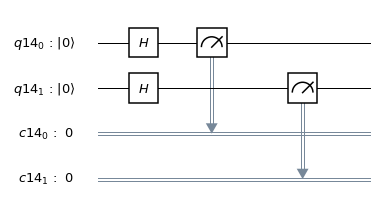

In [94]:
groverCircuit.measure(qr,cr)
groverCircuit.draw(output="mpl")

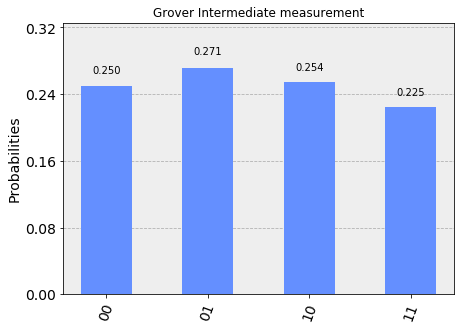

In [95]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(groverCircuit, simulator).result()
counts = result.get_counts(groverCircuit)
plot_histogram(counts, title='Grover Intermediate measurement')

#### 1.2 Apply Oracle for $ w = |00>$

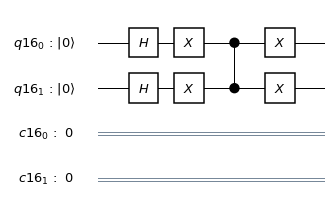

In [102]:
qr = QuantumRegister(2)
cr = ClassicalRegister(2)
groverCircuit = QuantumCircuit(qr,cr)
groverCircuit.h(qr)

'''oracle w = |00>'''
groverCircuit.x(qr)
groverCircuit.cz(qr[0],qr[1])
groverCircuit.x(qr)

groverCircuit.draw(output="mpl")

#### 1.2.1. Matrix element

$
(X \otimes X)   =  
\begin{pmatrix}
0 & 1\\
1 & 0
\end{pmatrix} \otimes \begin{pmatrix}
0 & 1\\
1 & 0
\end{pmatrix} = \begin{pmatrix}
0 & 0 & 0 & 1\\
0 & 0 & 1 & 0\\
0 & 1 & 0 & 0\\
1 & 0 & 0 & 0\\
\end{pmatrix}
$, $C_Z = 
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 0 & 0 & -1
\end{pmatrix}$

------------

#### ORACLE
$= (X \otimes X) \times C_z \times (X \otimes X)$

$= \begin{pmatrix}
0 & 0 & 0 & 1\\
0 & 0 & 1 & 0\\
0 & 1 & 0 & 0\\
1 & 0 & 0 & 0\\
\end{pmatrix}
\times
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 0 & 0 & -1
\end{pmatrix}
\times 
\begin{pmatrix}
0 & 0 & 0 & 1\\
0 & 0 & 1 & 0\\
0 & 1 & 0 & 0\\
1 & 0 & 0 & 0\\
\end{pmatrix}
= \begin{pmatrix}
-1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 0 & 0 & 1\\
\end{pmatrix}
$

-----------

#### CIRCUIT with ORCL and INIT

$= ORCL \times INIT $

$= 
\begin{pmatrix}
-1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 0 & 0 & 1\\
\end{pmatrix}
\times
\frac{1}{2} \begin{pmatrix}
    1  &  1  &  1  &  1 \\
    1  &  -1  &  1  &  -1 \\
    1  &  1  &  -1  &  -1 \\
    1  &  -1  &  -1  &  1 \\
\end{pmatrix}
$

In [103]:
job = execute(groverCircuit, backend)
job.result().get_unitary(groverCircuit, decimals=3)

array([[-0.5+0.j, -0.5+0.j, -0.5+0.j, -0.5+0.j],
       [ 0.5+0.j, -0.5+0.j,  0.5+0.j, -0.5+0.j],
       [ 0.5+0.j,  0.5+0.j, -0.5+0.j, -0.5+0.j],
       [ 0.5+0.j, -0.5+0.j, -0.5+0.j,  0.5+0.j]])

In [131]:
INIT = 0.5*np.array([[1,1,1,1],[1,-1,1,-1],[1,1,-1,-1],[1,-1,-1,1]])
CZ = np.array([[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,-1]])
XX = np.array([[0,0,0,1],[0,0,1,0],[0,1,0,0],[1,0,0,0]])

'''Oracle'''
ORCL = np.dot(XX,np.dot(CZ,XX))
print(ORCL)

[[-1  0  0  0]
 [ 0  1  0  0]
 [ 0  0  1  0]
 [ 0  0  0  1]]


In [137]:
'''FUll circuit matrix so far'''
np.dot(ORCL,INIT)

array([[-0.5, -0.5, -0.5, -0.5],
       [ 0.5, -0.5,  0.5, -0.5],
       [ 0.5,  0.5, -0.5, -0.5],
       [ 0.5, -0.5, -0.5,  0.5]])

#### 1.2.2 Manual Approach

---------
- Initial state: |00>
- After Hadamard Gate on first qubit: $\frac{1}{\sqrt{2}}|00> + \frac{1}{\sqrt{2}}|10>$
- After Hadamard Gate on second qubit: $\frac{1}{{2}}|00> + \frac{1}{{2}}|01>  +  \frac{1}{{2}}|10> + \frac{1}{{2}}|11>$
- After Application of Oracle: $-\frac{1}{{2}}|00> + \frac{1}{{2}}|01>  +  \frac{1}{{2}}|10> + \frac{1}{{2}}|11>$



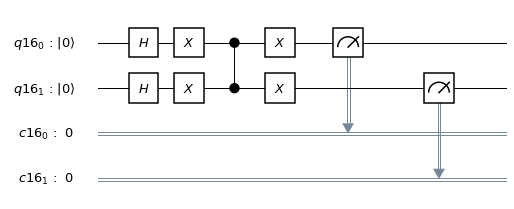

In [106]:
groverCircuit.measure(qr,cr)
groverCircuit.draw(output="mpl")

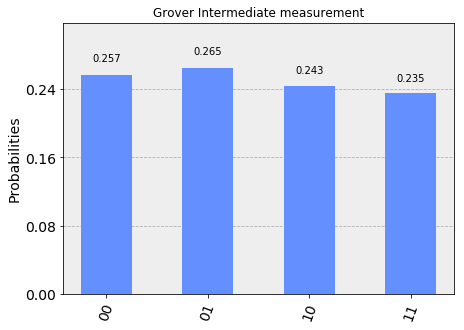

In [107]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(groverCircuit, simulator).result()
counts = result.get_counts(groverCircuit)
plot_histogram(counts, title='Grover Intermediate measurement')

#### 1.3 Apply Grover Transform

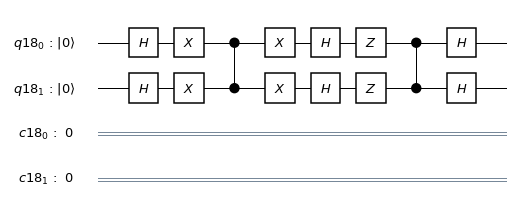

In [139]:
qr = QuantumRegister(2)
cr = ClassicalRegister(2)
groverCircuit = QuantumCircuit(qr,cr)
groverCircuit.h(qr)

'''oracle w = |00>'''
groverCircuit.x(qr)
groverCircuit.cz(qr[0],qr[1])
groverCircuit.x(qr)

'''Grover Transform'''
groverCircuit.h(qr)
'''Reflection'''
groverCircuit.z(qr)
groverCircuit.cz(qr[0],qr[1])
'''end of Reflection'''
groverCircuit.h(qr)
'''end of Grover Transform'''



groverCircuit.draw(output="mpl")

#### 1.3.1 Matrix Element

- $Z$: phase-flip gate

$
(Z \otimes Z)   =  
\begin{pmatrix}
1 & 0\\
0 & -1
\end{pmatrix} \otimes \begin{pmatrix}
1 & 0\\
0 & -1
\end{pmatrix} = \begin{pmatrix}
1 & 0 & 0 & 0\\
0 & -1 & 0 & 0\\
0 & 0 & -1 & 0\\
0 & 0 & 0 & 1\\
\end{pmatrix}
$

##### GROVER TRANSFORM (GT) 

$= (H \otimes H) \times Cz \times (Z \otimes Z)  \times (H \otimes H)$

$ =  
\frac{1}{2} \begin{pmatrix}
    1  &  1  &  1  &  1 \\
    1  &  -1  &  1  &  -1 \\
    1  &  1  &  -1  &  -1 \\
    1  &  -1  &  -1  &  1 \\
\end{pmatrix}
\times
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 0 & 0 & -1
\end{pmatrix}
\times
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & -1 & 0 & 0\\
0 & 0 & -1 & 0\\
0 & 0 & 0 & 1\\
\end{pmatrix}
\times
\frac{1}{2} \begin{pmatrix}
    1  &  1  &  1  &  1 \\
    1  &  -1  &  1  &  -1 \\
    1  &  1  &  -1  &  -1 \\
    1  &  -1  &  -1  &  1 \\
\end{pmatrix}$

$= \begin{pmatrix}
    -\frac{1}{2}  &  \frac{1}{2}  &  \frac{1}{2}  &  \frac{1}{2} \\
    \frac{1}{2}  &  -\frac{1}{2}  &  \frac{1}{2}  &  \frac{1}{2} \\
    \frac{1}{2}  &  \frac{1}{2}  &  -\frac{1}{2}  &  \frac{1}{2} \\
    \frac{1}{2}  &  \frac{1}{2}  &  \frac{1}{2}  &  -\frac{1}{2} \\
\end{pmatrix}
$

--------------

##### CIRCUIT with GT, ORCL and INIT
$ = GT \times ORCL \times INIT$

$ = \begin{pmatrix}
    -\frac{1}{2}  &  \frac{1}{2}  &  \frac{1}{2}  &  \frac{1}{2} \\
    \frac{1}{2}  &  -\frac{1}{2}  &  \frac{1}{2}  &  \frac{1}{2} \\
    \frac{1}{2}  &  \frac{1}{2}  &  -\frac{1}{2}  &  \frac{1}{2} \\
    \frac{1}{2}  &  \frac{1}{2}  &  \frac{1}{2}  &  -\frac{1}{2} \\
\end{pmatrix}
\times 
\begin{pmatrix}
-1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 0 & 0 & 1\\
\end{pmatrix}
\times
\frac{1}{2} \begin{pmatrix}
    1  &  1  &  1  &  1 \\
    1  &  -1  &  1  &  -1 \\
    1  &  1  &  -1  &  -1 \\
    1  &  -1  &  -1  &  1 \\
\end{pmatrix}$

$=\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 0 & -1 & 0\\
0 & -1 & 0 & 0\\
0 & 0 & 0 & -1\\
\end{pmatrix}$

In [138]:
job = execute(groverCircuit, backend)
job.result().get_unitary(groverCircuit, decimals=3)

array([[ 1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j, -1.+0.j,  0.+0.j],
       [ 0.+0.j, -1.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j, -1.+0.j]])

In [134]:
HH = 0.5*np.array([[1,1,1,1],[1,-1,1,-1],[1,1,-1,-1],[1,-1,-1,1]])
ZZ = np.array([[1,0,0,0],[0,-1,0,0],[0,0,-1,0],[0,0,0,1]])

'''Grover Transform'''
GT =  np.dot(HH,np.dot(CZ,np.dot(ZZ,HH)))
print(GT)

[[-0.5  0.5  0.5  0.5]
 [ 0.5 -0.5  0.5  0.5]
 [ 0.5  0.5 -0.5  0.5]
 [ 0.5  0.5  0.5 -0.5]]


In [136]:
'''FUll circut matrix'''
np.dot(INIT,np.dot(ORCL,GT))

array([[ 1.,  0.,  0.,  0.],
       [ 0.,  0., -1.,  0.],
       [ 0., -1.,  0.,  0.],
       [ 0.,  0.,  0., -1.]])

#### 1.4 Manual Approach

---------
- Initial state: |00>
- After Hadamard Gate on first qubit: $\frac{1}{\sqrt{2}}|00> + \frac{1}{\sqrt{2}}|10>$
- After Hadamard Gate on second qubit: $\frac{1}{{2}}|00> + \frac{1}{{2}}|01>  +  \frac{1}{{2}}|10> + \frac{1}{{2}}|11>$
- After Application of Oracle for $|00>$: $-\frac{1}{{2}}|00> + \frac{1}{{2}}|01>  +  \frac{1}{{2}}|10> + \frac{1}{{2}}|11>$
- After Application of Grover Transformation$: $1.0|00> + 0.0|01>  +  0.0|10> + 0.0|11>$


#### 1.5. Measurement

No measurements in circuit "circuit42": count data will return all zeros.


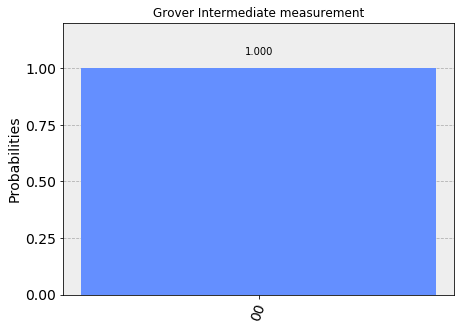

In [110]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(groverCircuit, simulator).result()
counts = result.get_counts(groverCircuit)
plot_histogram(counts, title='Grover Intermediate measurement')